In [71]:
import pandas as pd
import matplotlib.pyplot as plt
from looper import Looper
from PIL import Image
import numpy as np

from models import CNN_Encoder, RNN_Decoder_concat, image_features_extract_model

In [2]:
looper = Looper(CNN_Encoder, RNN_Decoder_concat, image_features_extract_model)

Training with the following params:
VOCAB_SIZE : 5000
BATCH_SIZE : 32
BUFFER_SIZE : 5000
embedding_dim : 512
embedding_words : 300
units : 512
embedding_size : 5001
MAX_LENGTH : 20
TOKENIZER_FOLDER : ./tokenizer/
TOKENIZER_NAME : spbe_tokenizer.e
CHECKPOINT_FOLDER : saved_models
## Run set_params to change params ##


In [3]:
tokenizer = looper.load_tokenizer()

loading from ./tokenizer/spbe_tokenizer.e


In [4]:
looper.params

{'VOCAB_SIZE': 5000,
 'BATCH_SIZE': 32,
 'BUFFER_SIZE': 5000,
 'embedding_dim': 512,
 'embedding_words': 300,
 'units': 512,
 'embedding_size': 5001,
 'MAX_LENGTH': 20,
 'TOKENIZER_FOLDER': './tokenizer/',
 'TOKENIZER_NAME': 'spbe_tokenizer.e',
 'CHECKPOINT_FOLDER': 'saved_models'}

In [8]:
# CHANGE PARAMS

params = {'VOCAB_SIZE': 5000,
 'BATCH_SIZE': 32,
 'BUFFER_SIZE': 5000,
 'embedding_dim': 1024,
 'embedding_words': 300,
 'units': 768,
 'embedding_size': 5001,
 'MAX_LENGTH': 20,
 'TOKENIZER_FOLDER': './tokenizer/',
 'TOKENIZER_NAME': 'spbe_tokenizer.e',
 'CHECKPOINT_FOLDER': './checkpoint_dis/1024_embed_758_units_concat_lvgg_164'}

params = looper.set_params(params)

Training with the following params:
VOCAB_SIZE : 5000
BATCH_SIZE : 32
BUFFER_SIZE : 5000
embedding_dim : 1024
embedding_words : 300
units : 768
embedding_size : 5001
MAX_LENGTH : 20
TOKENIZER_FOLDER : ./tokenizer/
TOKENIZER_NAME : spbe_tokenizer.e
CHECKPOINT_FOLDER : ./checkpoint_dis/1024_embed_758_units_concat_lvgg_164
## Run set_params to change params ##


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb4440f0438>]],
      dtype=object)

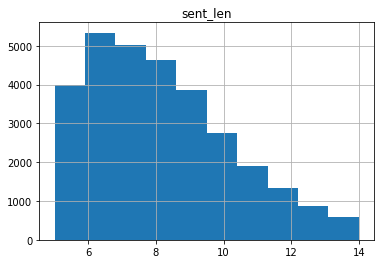

In [9]:
data = pd.read_csv('val.csv')
captions_val = data.title.to_list()
images_val = data.paths.to_list()

data = pd.read_csv('train.csv')
data['captions'] =  data['captions'].astype(str)
data['sent_len'] = data['captions'].apply(lambda r: len(r.split(' ')))
data = data[(data['sent_len']<20) & (data['sent_len']>4)]
captions_train = data.title.to_list()
images_train = data.paths.to_list()
data.hist('sent_len')

In [10]:
dataset_val = looper.make_dataset(images_val,captions_val)

max title len 20
len titles: 2375,len images: 2375
captions vector shape (2375, 20)
NOT using augmentations in loader


In [11]:
dataset_train = looper.make_dataset(images_train, captions_train, loader_type='aug')

max title len 20
len titles: 29254,len images: 29254
captions vector shape (29254, 20)
Using augmentations in loader


In [12]:
looper.train(dataset_train, dataset_val, 30, save_n=3)

Epoch 1 Batch 0 Loss 3.2564
Epoch 1 Batch 100 Loss 1.8087
Epoch 1 Batch 200 Loss 1.6152
Epoch 1 Batch 300 Loss 1.6743
Epoch 1 Batch 400 Loss 1.5264
Epoch 1 Batch 500 Loss 1.5292
Epoch 1 Batch 600 Loss 1.5714
Epoch 1 Batch 700 Loss 1.3580
Epoch 1 Batch 800 Loss 1.4788
Epoch 1 Batch 900 Loss 1.3803
precision at | val: 0.13958333333333334, train: 0.1420195866152237
Epoch 1 Loss 1.568177
Time taken for 1 epoch 375.75345158576965 sec

Epoch 2 Batch 0 Loss 1.5523
Epoch 2 Batch 100 Loss 1.3488
Epoch 2 Batch 200 Loss 1.3322
Epoch 2 Batch 300 Loss 1.2999
Epoch 2 Batch 400 Loss 1.3670
Epoch 2 Batch 500 Loss 1.3501
Epoch 2 Batch 600 Loss 1.2553
Epoch 2 Batch 700 Loss 1.2978
Epoch 2 Batch 800 Loss 1.1968
Epoch 2 Batch 900 Loss 1.4059
Epoch 2 Loss 1.421109
Time taken for 1 epoch 221.47534799575806 sec

Epoch 3 Batch 0 Loss 1.5315
Epoch 3 Batch 100 Loss 1.1103
Epoch 3 Batch 200 Loss 1.4136
Epoch 3 Batch 300 Loss 1.4072
Epoch 3 Batch 400 Loss 1.3678
Epoch 3 Batch 500 Loss 1.3552
Epoch 3 Batch 600 Los

[{'epoch': 0,
  'val': 0.13958333333333334,
  'train': 0.1420195866152237,
  'loss': 1434.8820747931798},
 {'epoch': 3,
  'val': 0.18458333333333332,
  'train': 0.19516166311795594,
  'loss': 1213.207467397054},
 {'epoch': 6,
  'val': 0.1823214340209961,
  'train': 0.2056693989071038,
  'loss': 1108.6605859001477},
 {'epoch': 9,
  'val': 0.13047618865966798,
  'train': 0.16179417677915814,
  'loss': 1011.1501996914545},
 {'epoch': 12,
  'val': 0.18291666666666667,
  'train': 0.254542349726776,
  'loss': 897.3202121853828},
 {'epoch': 15,
  'val': 0.16357143402099608,
  'train': 0.28135245901639344,
  'loss': 771.0026596784592},
 {'epoch': 18,
  'val': 0.15440476735432943,
  'train': 0.39735884536159494,
  'loss': 650.3882899681727},
 {'epoch': 21,
  'val': 0.12964285532633463,
  'train': 0.5659153005464481,
  'loss': 536.71677394708},
 {'epoch': 24,
  'val': 0.10839285532633464,
  'train': 0.7453893442622951,
  'loss': 443.8639115492503},
 {'epoch': 27,
  'val': 0.10541666666666667,
  

In [88]:
plot = [{'epoch': 0,
  'val': 0.13958333333333334,
  'train': 0.1420195866152237,
  'loss': 1434.8820747931798},
 {'epoch': 3,
  'val': 0.18458333333333332,
  'train': 0.19516166311795594,
  'loss': 1213.207467397054},
 {'epoch': 6,
  'val': 0.1823214340209961,
  'train': 0.2056693989071038,
  'loss': 1108.6605859001477},
 {'epoch': 9,
  'val': 0.13047618865966798,
  'train': 0.16179417677915814,
  'loss': 1011.1501996914545},
 {'epoch': 12,
  'val': 0.18291666666666667,
  'train': 0.254542349726776,
  'loss': 897.3202121853828},
 {'epoch': 15,
  'val': 0.16357143402099608,
  'train': 0.28135245901639344,
  'loss': 771.0026596784592},
 {'epoch': 18,
  'val': 0.15440476735432943,
  'train': 0.39735884536159494,
  'loss': 650.3882899681727},
 {'epoch': 21,
  'val': 0.12964285532633463,
  'train': 0.5659153005464481,
  'loss': 536.71677394708},
 {'epoch': 24,
  'val': 0.10839285532633464,
  'train': 0.7453893442622951,
  'loss': 443.8639115492503},
 {'epoch': 27,
  'val': 0.10541666666666667,
  'train': 0.98224043715847,
  'loss': 364.41039657592773}]

In [85]:
def plot_losses(plot):
    plt.plot([i['epoch'] for i in plot], [i['val'] for i in plot], c = 'k', label='val')
    plt.plot([i['epoch'] for i in plot], [i['train'] for i in plot], c ='g', label='train')
    plt.legend(loc="upper left")

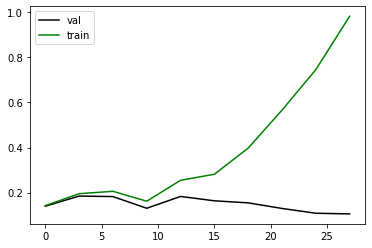

In [89]:
plot_losses(plot)

# CHECK VAL

Real Caption: how to short out a pacemaker
0.5, how to surprise your fear of your civist , score 2
0.7, how to know if you detective porn , score 2
0.9, how to get your genderphy , score 2
1, how to get your feet , score 2


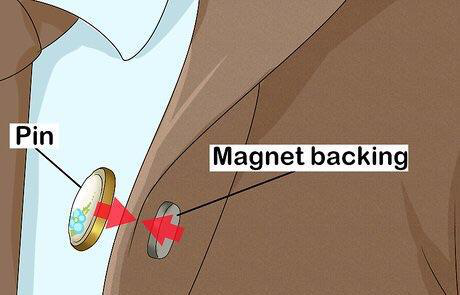

In [32]:
#### captions on the validation set

#img_name_val, cap_val
rid = np.random.randint(0, len(captions_val))
image = images_val[rid] #'./img.jpg' #
real_caption = captions_val[rid]
print ('Real Caption:', real_caption)

at_k = 5 # use 5 first words to compute score
seed = None #'▁cat'

for t in [0.5,0.7,0.9,1]:
    predicted_ids, a = looper.predict_one(image, t, argmax =2, seed=seed)
    real_cap = set(real_caption.split(' '))
    predicted_cap =  looper.tokenizer.decode(predicted_ids)
    score = len(real_cap.intersection(set(predicted_cap.split(' ')[:at_k]))) #/len(word)
    print(f"{t}, {predicted_cap}, score {score}")
Image.open(image)

0.5, how to up a migings , score 3
0.7, how to magically delete a foreignment to quiet postpants , score 3
0.9, how to retire to a religion , score 3
1, how to get a relationship with your homework , score 3


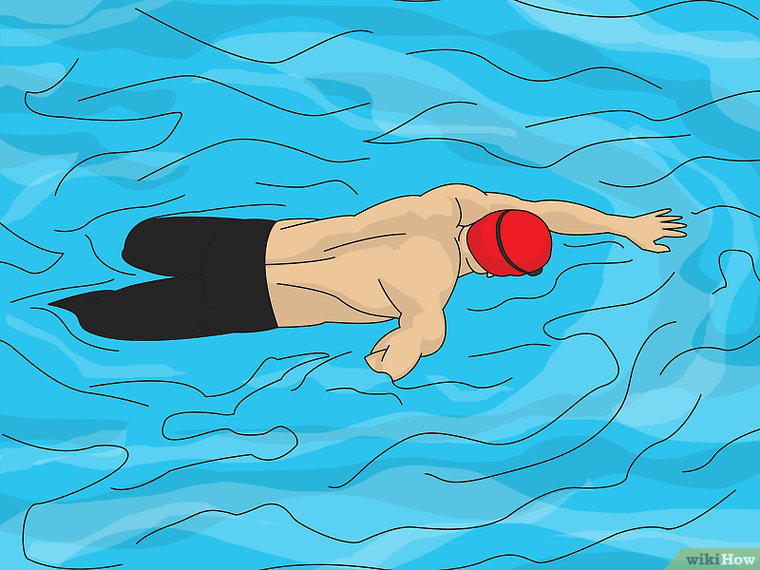

In [36]:
#### captions on the validation set

#img_name_val, cap_val
#rid = np.random.randint(0, len(captions_val))
image =  './img.jpg' #images_val[rid]
#real_caption = captions_val[rid]
#print ('Real Caption:', real_caption)

at_k = 5 # use 5 first words to compute score
seed =   None # '▁computer'

for t in [0.5,0.7,0.9,1]:
    predicted_ids, a = looper.predict_one(image, t, argmax =2, seed=seed)
    real_cap = set(real_caption.split(' '))
    predicted_cap =  looper.tokenizer.decode(predicted_ids)
    score = len(real_cap.intersection(set(predicted_cap.split(' ')[:at_k]))) #/len(word)
    print(f"{t}, {predicted_cap}, score {score}")
Image.open(image)

### CHECK TRAIN

Real Caption: how to become famous on reddit
0.5, how to prepare for a snoted egg , score 2
0.7, how to become an ecoachy vagina , score 3
0.9, how to select paracet is sick pen , score 2
1, how to prepare for a snoted egg , score 2


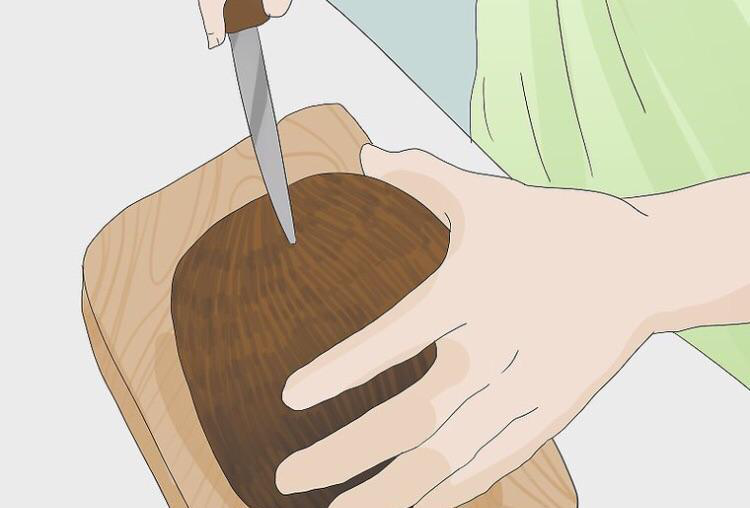

In [67]:
#### captions on the validation set

#img_name_val, cap_val
rid = np.random.randint(0, len(captions_train))
image = images_train[rid] #'./img.jpg' #
real_caption = captions_train[rid]
print ('Real Caption:', real_caption)

at_k = 5 # use 5 first words to compute score
seed = None #'▁cat'

for t in [0.5,0.7,0.9,1]:
    predicted_ids, a = looper.predict_one(image, t, argmax =2, seed=seed)
    real_cap = set(real_caption.split(' '))
    predicted_cap =  looper.tokenizer.decode(predicted_ids)
    score = len(real_cap.intersection(set(predicted_cap.split(' ')[:at_k]))) #/len(word)
    print(f"{t}, {predicted_cap}, score {score}")
Image.open(image)